# 0. Setting

### Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PLEASE SPECIFY THE PATH OF THIS FILE HERE
%cd '/content/drive/MyDrive/chanwoo/MLDL1'

# 1. Tensor

In [3]:
import torch

### 1-1. Tensor Generations

In [4]:
# Tensor Generations from Data
array = [[1,2,3], [4,5,6]]
tensor = torch.tensor(array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [5]:
# Tensor Generations by Methods
t1 = torch.zeros(2,3)
t2 = torch.arange(4)
t3 = torch.rand(2,2)

print(t1)
print()
print(t2)
print()
print(t3)
print()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([0, 1, 2, 3])

tensor([[0.0369, 0.8804],
        [0.7560, 0.9740]])



### 1-2. Tensor Attributes

In [6]:
# Tensor Attributes - shape, dtype, device
t = torch.tensor([[1,2,3],
                  [4,5,6]])

print(t)
print(t.shape)
print(t.dtype)
print(t.device)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.int64
cpu


In [7]:
# Tensor Attributes - to(device)
t = torch.tensor([[1,2,3],
                  [4,5,6]])
print(t.device)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t_gpu = t.to(device)
print(t_gpu.device)

cpu
cuda:0


### 1-3. Tensor Manipulations

In [8]:
# Tensor Shape - reshape
t1 = torch.arange(6)
print(t1.shape)
print(t1)
print()

t1_reshaped = t1.reshape(2,3)
print(t1_reshaped.shape)
print(t1_reshaped)

torch.Size([6])
tensor([0, 1, 2, 3, 4, 5])

torch.Size([2, 3])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [9]:
# Tensor Shape - squeeze, unsqueeze
t1 = torch.arange(6).reshape(2,3)
print(t1)
print()

t1_unsqueeze = t1.unsqueeze(1)
print(t1_unsqueeze.shape)
print(t1_unsqueeze)

tensor([[0, 1, 2],
        [3, 4, 5]])

torch.Size([2, 1, 3])
tensor([[[0, 1, 2]],

        [[3, 4, 5]]])


In [10]:
# Tensor Shape - permute
t1 = torch.arange(6).reshape(2,3)
print(t1)

t1_reshape = t1.reshape(3,2)
t1_permute = t1.permute(1,0)
print(t1_reshape)
print(t1_permute)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


### 1-4. Tensor Operations

In [11]:
# Matrix multiplication
t1 = torch.arange(6).reshape(2,3)
t2 = torch.arange(12).reshape(4,3)
print(f'<t1>\n{t1}')
print()
print(f'<t2>\n{t2}')
print()

t2 = t2.transpose(0,1)
print(f'<t1> {t1.shape}')
print(f'<t2> {t2.shape}')

t3 = t1 @ t2
# Same as torch.matmul(t1, t2)
print(f'<t3> {t3.shape}')

<t1>
tensor([[0, 1, 2],
        [3, 4, 5]])

<t2>
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

<t1> torch.Size([2, 3])
<t2> torch.Size([3, 4])
<t3> torch.Size([2, 4])


In [12]:
# argmax, sum
t1 = torch.tensor([
    [3,6,4],
    [2,4,7]
])
print(f'<t1>\nshape: {t1.shape}\n{t1}')

<t1>
shape: torch.Size([2, 3])
tensor([[3, 6, 4],
        [2, 4, 7]])


In [13]:
# argmax, sum
col_argmax = torch.argmax(t1, dim=0)
print(col_argmax)

col_argmax_keepdim = torch.argmax(t1, dim=0, keepdim=True)
print(col_argmax_keepdim)

col_sum = torch.sum(t1, dim=0)
print(col_sum)

tensor([0, 0, 1])
tensor([[0, 0, 1]])
tensor([ 5, 10, 11])


In [14]:
# stack
x1 = torch.tensor([1,2,3])
x2 = torch.tensor([4,5,6])
print(x1.shape, x2.shape)
print()

stack_0 = torch.stack([x1, x2], dim=0)
print(f'<stack_0>\n{stack_0.shape}\n{stack_0}')
print()

stack_1 = torch.stack([x1, x2], dim=1)
print(f'<stack_1>\n{stack_1.shape}\n{stack_1}')

torch.Size([3]) torch.Size([3])

<stack_0>
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])

<stack_1>
torch.Size([3, 2])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [15]:
# cat
x1 = torch.tensor([1,2,3])
x2 = torch.tensor([4,5,6])
print(x1.shape, x2.shape)
print()

concat = torch.cat([x1, x2], dim=0)
print(f'<concat>\n{concat.shape}\n{concat}')

torch.Size([3]) torch.Size([3])

<concat>
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


### 1-5. Autograd Engine

In [16]:
x = torch.tensor(-2.0, requires_grad = True)
y = torch.tensor(5.0, requires_grad = True)
z = torch.tensor(-4.0, requires_grad = True)
print(x.grad)

f = (x + y) * z
print(x.grad)

f.backward()

print(x.grad)
print(y.grad)
print(z.grad)

None
None
tensor(-4.)
tensor(-4.)
tensor(3.)


Example of Backpropagation in 2-layer Neural Network

<img src = "https://drive.google.com/uc?id=1pyZiWipSU8v8NEoyfDDxIaRXOgNlFwon" height = 400>

In [17]:
import torch.nn.functional as F
"""
F.relu() for ReLU layer.
ex) y = F.relu(x)
"""

x = torch.ones(7) # input: (7,)
y = torch.zeros(3) # output: (3,)

# Generate w1, b1, w2, b2
w1 = torch.randn(7,5, requires_grad=True) # (7,) @ (7,5) = (5,)
b1 = torch.randn(5, requires_grad=True) # (5,)
w2 = torch.randn(5,3, requires_grad=True) # (5,) @ (5,3) = (3,)
b2 = torch.randn(3, requires_grad=True) # (3,)

# Compute z1
z1 = x @ w1 + b1 # (5,)

# Compute z2
z2 = F.relu(z1) # (5,)

# Compute z3
z3 = z2 @ w2 + b2 # (3,)

# Calculate loss
loss = F.binary_cross_entropy_with_logits(z3, y)

# Backpropagation
loss.backward()

# Print the gradient of w and b
print(w1.grad)
print(b1.grad)
print(w2.grad)
print(b2.grad)

tensor([[1.3853, 0.0276, 0.0000, 0.1741, 0.0000],
        [1.3853, 0.0276, 0.0000, 0.1741, 0.0000],
        [1.3853, 0.0276, 0.0000, 0.1741, 0.0000],
        [1.3853, 0.0276, 0.0000, 0.1741, 0.0000],
        [1.3853, 0.0276, 0.0000, 0.1741, 0.0000],
        [1.3853, 0.0276, 0.0000, 0.1741, 0.0000],
        [1.3853, 0.0276, 0.0000, 0.1741, 0.0000]])
tensor([1.3853, 0.0276, 0.0000, 0.1741, 0.0000])
tensor([[0.0161, 0.3779, 0.0025],
        [0.0156, 0.3676, 0.0025],
        [0.0000, 0.0000, 0.0000],
        [0.0477, 1.1232, 0.0075],
        [0.0000, 0.0000, 0.0000]])
tensor([0.0141, 0.3324, 0.0022])


# 2. Intro to ML/DL Implementation

### 2-1. Dataset and DataLoader

In [18]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [19]:
import numpy as np
from PIL import Image

class SimpleDataset(Dataset):
  def __init__(self):
    lines = []
    with open('data/mini_MNIST/annotations.txt', 'r') as f:
        lines = f.readlines()

    self.img_label_pairs = []
    for line in lines:
        self.img_label_pairs.append(line.strip().split(','))

  def __getitem__(self, idx):
    # get image path and label corresponding to idx
    img_path, label = self.img_label_pairs[idx]

    # load image file and convert to numpy array
    img = Image.open('data/mini_MNIST/' + img_path)
    img = np.array(img)

    # load label and convert to integer
    label = int(label)

    return img, label

  def __len__(self):
    return len(self.img_label_pairs)

In [20]:
dataset = SimpleDataset()
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [21]:
# get the image and label using index
idx = 1
img, label = dataset[idx]
print(f'idx: {idx}, img shape: {img.shape}, label: {label}')

idx: 1, img shape: (28, 28), label: 2


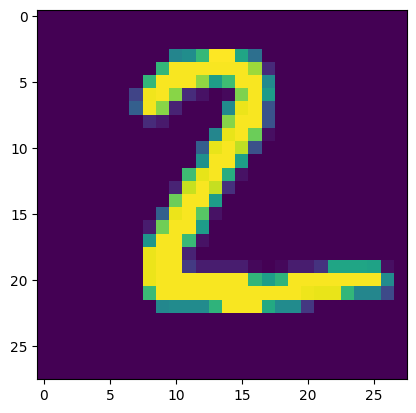

In [22]:
# numpy array to image
import matplotlib.pyplot as plt
plt.imshow(img)

In [23]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [24]:
for batch in dataloader:
    imgs, labels = batch
    print(f'batch img shape: {imgs.shape}, batch label shape: {labels.shape}')
    break

batch img shape: torch.Size([10, 28, 28]), batch label shape: torch.Size([10])


In [25]:
labels

tensor([6, 3, 5, 3, 8, 4, 7, 7, 8, 9])

### 2-2. Deep Learning Tutorial

#### 2-2-1. Dataset and Datalader

In [26]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Set dataset
train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

# Set dataloader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

example data shape:  torch.Size([64, 1, 28, 28])


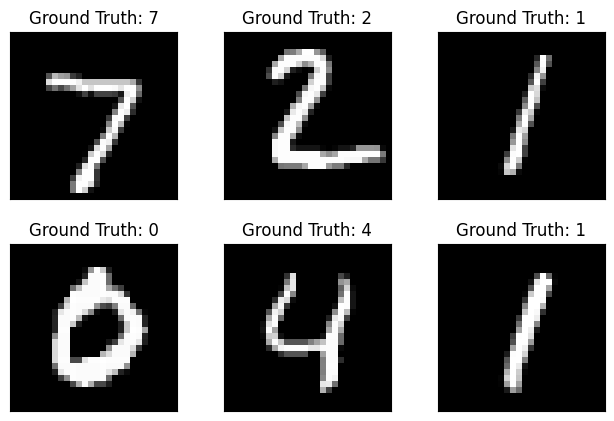

In [27]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("example data shape: ", example_data.shape)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

#### 2-2-2. Creating a Model

In [28]:
import torch.nn as nn
import torch.nn.functional as F

class Simple_NN(nn.Module):
    '''
    - input shape: (1, 28, 28)
    - fc1: apply a linear transformation. output features should be 128
    - fc2: apply a linear transformation. output features should be 64
    - classifier: apply a linear transformation. output features should be the class size (10)

    * input -> fc1 -> relu -> fc2 -> relu -> classifier
    * nn.Linear() for fc layer
     ex) fc = nn.Linear(input_dim, output_dim)
         y = fc(x)
    '''
    def __init__(self):
        super(Simple_NN, self).__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.classifier = nn.Linear(64, 10)


    def forward(self, x):
        x = x.reshape(-1, 784) # Note: To apply fc layer, input should be flattened (784 = 28*28)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.classifier(x)

        return x

In [29]:
model = Simple_NN()
print(model)

Simple_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)


#### 2-2-3. Training a Model

In [30]:
from tqdm import tqdm

def train(model, train_loader, loss_fn, optimizer, epochs, device, scheduler):
    # (1) Set the mode to train and its device
    model.to(device)
    model.train()

    for epoch in range(epochs):
        train_loss = 0.0

        for batch in tqdm(train_loader):
            # (2) Initialize Gradients
            optimizer.zero_grad()

            # (3) Get input and target from batch and set their device
            input, target = batch
            input, target = input.to(device), target.to(device)

            # (4) Calculate loss and Backpropagate to calculate the gradient
            output = model(input)
            loss = loss_fn(output, target)
            loss.backward()

            # (5) Update model parameters using the optimizer
            optimizer.step()

            train_loss += loss.detach().item()

        # (8) Update the scheduler
        scheduler.step()

        # (9) Calculate the average loss in this epoch
        train_loss /= len(train_loader.dataset)
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

In [31]:
import torch.nn as nn
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
train(model, train_loader, loss_fn, optimizer, epochs, device, scheduler)

100%|██████████| 938/938 [00:08<00:00, 108.01it/s]


Epoch: 1, Training Loss: 0.008731896149367094


100%|██████████| 938/938 [00:07<00:00, 124.51it/s]


Epoch: 2, Training Loss: 0.0032528725956877075


100%|██████████| 938/938 [00:07<00:00, 117.67it/s]

Epoch: 3, Training Loss: 0.0023094996612519026


#### 2-2-4. Testing a Model

In [33]:
def test(model, test_loader, device):
    # Set the mode to train and its device
    model.to(device)
    model.eval()

    with torch.no_grad():
        correct = 0
        for batch in tqdm(test_loader):
            # Get input and target from batch and set their device
            input, target = batch
            input, target = input.to(device), target.to(device)

            # Get output using the model
            output = model(input)

            # Get count of correctly classified images
            pred = output.argmax(dim=1)
            correct += (pred == target.reshape(-1)).sum()

    print(f'\nAccuracy: {correct / len(test_loader.dataset)}')

In [34]:
test(model, test_loader, device)

100%|██████████| 157/157 [00:01<00:00, 133.14it/s]


Accuracy: 0.9590999484062195


# 3. Handling Image Dataset

### 3-1. CIFAR-10 Dataset and its Augmentation

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

In [36]:
train_dataset = datasets.CIFAR10(root="data/CIFAR_10", train=True, download=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root="data/CIFAR_10", train=False, download=True, transform=ToTensor())

batch_size = 8
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
CIFAR10_LABEL = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def visualize_batch(batch, augment=None):
    images, labels = batch
    batch_size = images.shape[0]
    pltsize = 2
    plt.figure(figsize=(batch_size * pltsize, pltsize))
    for i in range(batch_size):
        plt.subplot(1, batch_size, i + 1)
        plt.axis('off')
        plt.imshow(np.transpose(augment(images[i]) if augment else images[i], (1, 2, 0)))
        plt.title('Class: ' + str(CIFAR10_LABEL[labels[i].item()]))

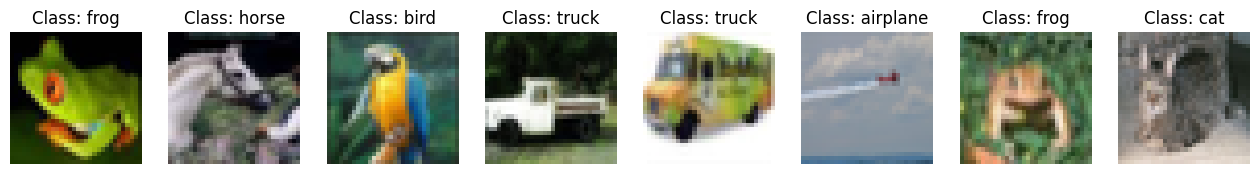

In [38]:
sample_batch = next(iter(train_loader))
visualize_batch(sample_batch)

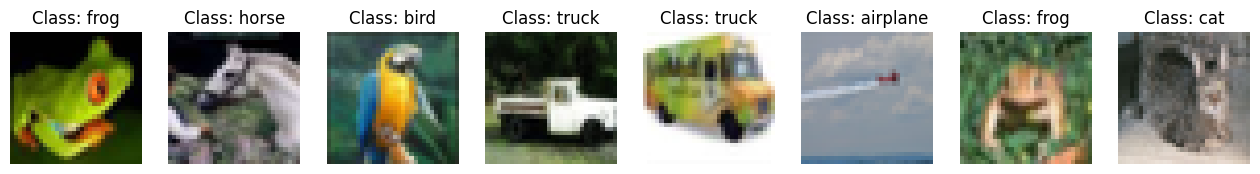

In [39]:
augment = transforms.RandomHorizontalFlip(p=0.5)
visualize_batch(sample_batch, augment=augment)

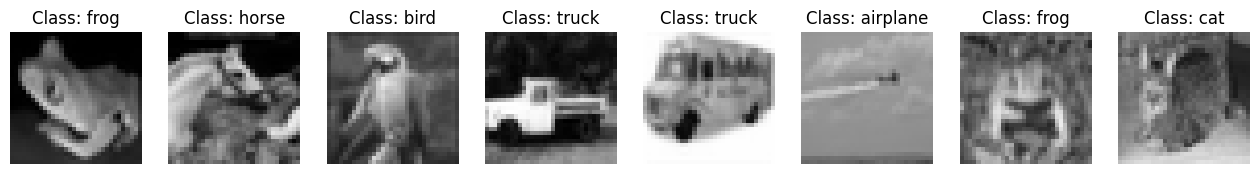

In [40]:
augment = transforms.Grayscale(num_output_channels=3)
visualize_batch(sample_batch, augment=augment)

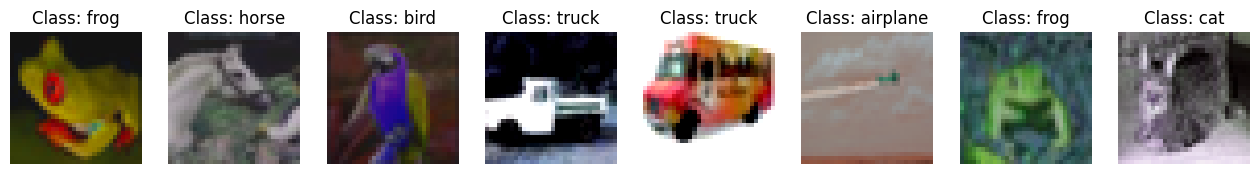

In [41]:
augment = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
visualize_batch(sample_batch, augment=augment)

In [ ]:
# augment = transforms.RandomVerticalFlip(p=0.5)
# augment = transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
# visualize_batch(sample_batch, augment=augment)

### 3-2. Data Augmentation in DataLoader

In [42]:
def collate_fn(data_samples):
    batch_x, batch_y = [], []

    ### AUGMENTATION ###
    augment_transform = transforms.Compose([
        transforms.ColorJitter(brightness=0.5),
        transforms.RandomHorizontalFlip(p=0.5),
    ])

    for image, label in data_samples:
        image = augment_transform(image)  ### AUGMENTATION
        label = torch.Tensor([label])
        batch_x.append(image)
        batch_y.append(label)
    batch_x = torch.stack(batch_x).float()
    batch_y = torch.cat(batch_y).long()

    return (batch_x, batch_y)

In [43]:
batch_size = 8
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

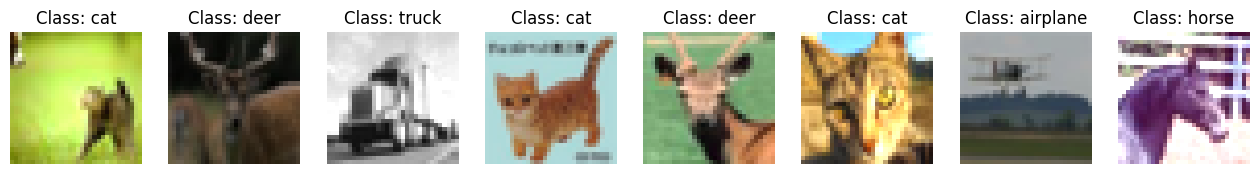

In [44]:
sample_batch = next(iter(train_loader))
visualize_batch(sample_batch)

# 4. Implementation of CNN

In [47]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=8*16*16, out_features=10),
        )

    def forward(self, x):
        x = self.conv(x)
        return x

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

epochs = 3

In [51]:
train(model, train_loader, loss_fn, optimizer, epochs, device, scheduler)

100%|██████████| 6250/6250 [00:29<00:00, 210.23it/s]


Epoch: 1, Training Loss: 0.2505252362561226


100%|██████████| 6250/6250 [00:29<00:00, 212.03it/s]


Epoch: 2, Training Loss: 0.23863067512869834


100%|██████████| 6250/6250 [00:29<00:00, 208.84it/s]

Epoch: 3, Training Loss: 0.23123361836194992


In [52]:
test(model, test_loader, device)

100%|██████████| 1250/1250 [00:05<00:00, 235.17it/s]


Accuracy: 0.3482999801635742
